In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import quad
from scipy.misc import derivative

# Probability Density Function 
<p> The following script is used to plot the [probability density function], $p(x,t) = \sqrt{\frac{\beta_T}{\pi}} e^{-\beta_T \left[ x - x_0 e^{-\gamma t} \right]^2}$ such that $\beta_T = \frac{\beta_0 \beta}{\beta_0 + \beta e^{-2\gamma t}}$ and $\beta = \frac{\gamma}{2D\left[ 1-e^{-2\gamma t} \right]}$; with the [initial probability density] defined as: $ p(x_0,t=0) = \sqrt{\frac{\beta_0}{\pi}}e^{-\beta_0(x_0-x_0 e^{-\gamma t})^2} $. The plot considers various $\left< x(t=0) \right> = x_0 \in [1,20]$. </p>

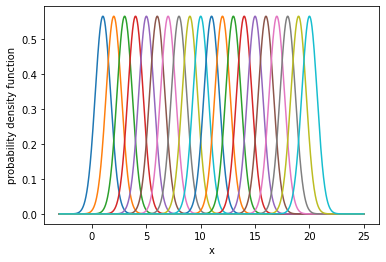

In [2]:
#define the probability density function
def pro1(x, x0, b0, D, g, t):
    s = (np.exp(-2*g*t))/(2*b0) + (D*(1-np.exp(-2*g*t)))/(g)
    bt = 1/(2*s)
    return np.sqrt(bt/np.pi)*np.exp(-bt*(x-x0*np.exp(-g*t))**2)

#initialize the constants
b0=1
D=4
g=1
t=0

#generate the constants for x0
list_x0=[]
for x0 in range(1,21):
    list_x0.append(x0)

#x-axis values
points=1000
x_range=np.linspace(-3,25,points)

ans=np.zeros(points) #generate zeros of array for later value input

#looping to generate the result and plot the graph 
for x0 in list_x0:
    f1 = open('result_x0'+str(x0)+".txt","w")
    for j in range(0, len(x_range)):
        x=x_range[j]
        ans[j]=pro1(x, x0, b0, D, g, t)
        f1.write(str(x)+'\t\t'+str(ans[j])+'\n')
    plt.plot(x_range,ans)
    f1.close
    
plt.xlabel('x')
plt.ylabel('probability density function')
plt.show()

# Information length versus Mean ($\left< x(t=0) \right>$) when time $t=0$
<p> Continue with the values of $\left< x(t=0) \right>$, the plot for [information length] again [mean] is shown below. </p>

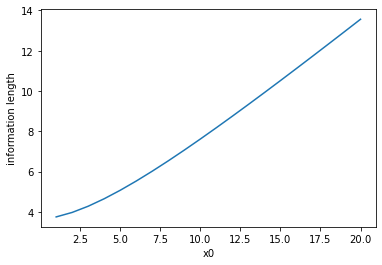

In [4]:
#define exponential function 
def A(i,g):
    return np.exp(-2*g*i)

#range of time, t
points=100
t_range=np.linspace(0,6,points)

#generate zeros of array for later value input
length=np.zeros(points)
max_length=np.zeros(x0)

#looping to generate the result and plot the graph 
for x0 in list_x0:
    f1=open(str(x0)+'.txt','w')
    for j in range(0,len(t_range)):
        t=t_range[j]
        length[j]=quad(lambda j: np.sqrt((2*b0*g*A(j,g)*(2*A(j,g)*(2*D-(g)/(b0))**2+x0**2*g**2))/(g*A(j,g)+2*b0*D*(1-A(j,g)))) , 0, j)[0]
        f1.write(str(t)+'\t\t'+str(length[j])+'\n')
    max_length[x0-1]=np.max(length)
    f1.close

plt.plot(list_x0, max_length)
plt.xlabel('x0')
plt.ylabel('information length')
plt.show()